# Tetrode processing

## Imports

In [1]:
import spikeinterface.full as si
import spikeinterface.widgets as sw
import spikeinterface.extractors as se
import probeinterface as pi
from probeinterface import generate_tetrode, ProbeGroup
from probeinterface.plotting import plot_probe, plot_probegroup


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import os

import warnings
warnings.simplefilter("ignore")

%matplotlib widget
print(f"SpikeInterface version: {si.__version__}")
np.set_printoptions(threshold=np.inf)


SpikeInterface version: 0.101.1


## Read in Data

In [2]:
path_to_data = "C:\\Users\\ryanz\\Documents\\NAc Analysis\\raw\\testdata\\experiment1\\recording1"
full_raw_rec = si.read_openephys(path_to_data)


In [3]:
path_to_timestamps = "C:\\Users\\ryanz\\Documents\\NAc Analysis\\raw\\testdata\\experiment1\\recording1\\events\\Rhythm_FPGA-100.0\\TTL_1\\timestamps.npy"
timestamps = np.load(path_to_timestamps)

path_to_channels = "C:\\Users\\ryanz\\Documents\\NAc Analysis\\raw\\testdata\\experiment1\\recording1\\events\\Rhythm_FPGA-100.0\\TTL_1\\channels.npy"
channels = np.load(path_to_channels)

path_to_channel_states = "C:\\Users\\ryanz\\Documents\\NAc Analysis\\raw\\testdata\\experiment1\\recording1\\events\\Rhythm_FPGA-100.0\\TTL_1\\channel_states.npy"
channel_states = np.load(path_to_channel_states)

In [4]:
timestamps = timestamps / 1000000

In [5]:
vals = np.unique(np.abs(channel_states))

events = {}
for i, channel in enumerate(channel_states):
    if channel in events:
        events[channel].append(timestamps[i])
        continue
    
    events[channel] = [timestamps[i]]

events.keys()

dict_keys([6, -6, 2, 4, -2, -4, 5, -5, 1, -1])

In [6]:

structured_events = []
for channel, timestamps in events.items():
    structured_array = np.zeros(len(timestamps), dtype=[('time', float), ('label', 'U10')])
    structured_array['time'] = timestamps
    structured_array['label'] = channel  # using channel as label
    structured_events.append(structured_array)



In [7]:
structured_events

[array([( 13.534266, '6'), ( 14.877368, '6'), ( 15.070264, '6'),
        ( 15.076264, '6'), ( 15.088264, '6'), ( 15.464156, '6'),
        ( 16.158644, '6'), ( 16.218943, '6'), ( 16.236942, '6'),
        ( 16.595136, '6'), ( 16.636535, '6'), ( 16.936529, '6'),
        ( 16.989328, '6'), ( 17.085926, '6'), ( 17.094926, '6'),
        ( 17.106926, '6'), ( 17.475619, '6'), ( 17.506819, '6'),
        ( 17.806813, '6'), ( 17.832612, '6'), ( 18.162907, '6'),
        ( 18.236405, '6'), ( 18.276604, '6'), ( 18.299104, '6'),
        ( 18.695996, '6'), ( 18.843293, '6'), ( 18.934492, '6'),
        ( 18.940492, '6'), ( 18.953991, '6'), ( 19.313085, '6'),
        ( 19.359284, '6'), ( 19.471182, '6'), ( 19.480182, '6'),
        ( 19.490681, '6'), ( 19.828775, '6'), ( 19.885774, '6'),
        ( 19.971572, '6'), ( 19.989572, '6'), ( 20.370865, '6'),
        ( 20.412264, '6'), ( 20.482163, '6'), ( 20.491162, '6'),
        ( 20.503162, '6'), ( 20.794157, '6'), ( 20.855055, '6'),
        ( 20.932454, '6')

## Generate Probe Group

Need more info on the tetrode used to record this data. <br>
For now, 8 tetrodes are assumed with 32 total channels. <br> Channels are assigned to tetrodes in order of appearance in the id list provided. This needs to be validated

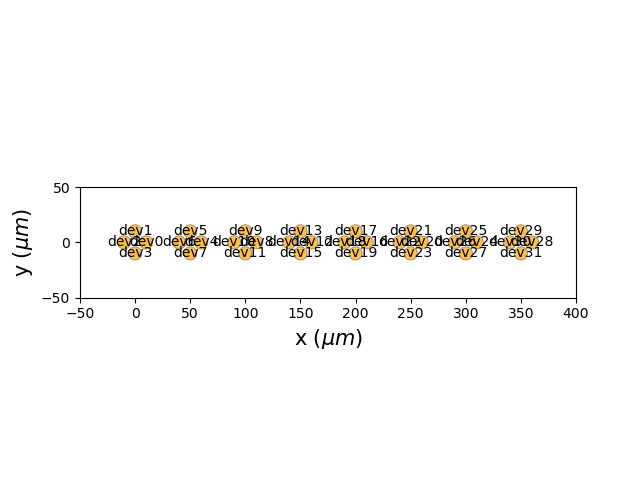

In [8]:
channel_names = list(full_raw_rec.get_channel_ids())
probe_group = ProbeGroup()

for i in range(int(len(channel_names) / 4)):
    tetrode = generate_tetrode()
    tetrode.move([i * 50, 0])
    probe_group.add_probe(tetrode)
    
probe_group.set_global_device_channel_indices([i for i in range(32)])
raw_rec = full_raw_rec.set_probegroup(probe_group, group_mode="by_probe")
plot_probegroup(probe_group, with_device_index=True, same_axes=True)


In [9]:
#probe_group.to_dataframe(complete=True)

In [10]:
raw_rec.get_channel_groups()

array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5,
       5, 5, 6, 6, 6, 6, 7, 7, 7, 7], dtype=int64)

In [11]:
raw_rec.get_channel_ids()

array(['CH4', 'CH5', 'CH6', 'CH7', 'CH2', 'CH3', 'CH30', 'CH31', 'CH26',
       'CH27', 'CH28', 'CH29', 'CH22', 'CH23', 'CH24', 'CH25', 'CH18',
       'CH19', 'CH20', 'CH21', 'CH1', 'CH16', 'CH17', 'CH32', 'CH12',
       'CH13', 'CH14', 'CH15', 'CH8', 'CH9', 'CH10', 'CH11'], dtype='<U64')

## First Visualization: Trace

Visualize voltage fluctuations as a function of time <br>
Set mode to "line" for better visualization <br>
both raw data and filtered data (getting rid of natural voltage fluctuations) are overlayed on top of eachother

In [12]:
save_path = "C:\\Users\\ryanz\\Documents\\NAc Analysis\\traces"
#remove noise
recording_f = si.bandpass_filter(raw_rec, freq_min=300, freq_max=9000)
recording_cmr = si.common_reference(recording_f, reference='global', operator='median')

#plot trace
w = si.plot_traces(recording_cmr, mode='line', time_range=[13, 14], backend="ipywidgets", events=structured_events[0], color_groups=True, show_channel_ids=True)

#this will be the recording we will use in future processing
recording_loaded = recording_cmr

AppLayout(children=(TimeSlider(children=(Dropdown(description='segment', options=(0,), value=0), Button(icon='…

In [13]:
#save recording with noise removed
#recording_saved = recording_cmr.save(folder=save_path + "\\test_trace")

In [14]:
#restore recording
#recording_loaded = si.load_extractor("C:\\Users\\ryanz\\Documents\\NAc Analysis\\traces\\test_trace")

## Removing bad channels

In [15]:
%matplotlib widget
bad_channel_ids, channel_labels = si.detect_bad_channels(recording_f, method='coherence+psd')
print('bad_channel_ids', bad_channel_ids)
print('channel_labels', channel_labels)
recording_good_channels_f = recording_f.remove_channels(bad_channel_ids)
recording_good_channels = si.common_reference(recording_good_channels_f, reference='global', operator='median')

print(recording_good_channels)
print(recording_good_channels.channel_ids)

w = si.plot_traces(recording_good_channels, mode='line', time_range=[18.5, 19], backend="ipywidgets", events=np.array([18.6]), color_groups=True)

recording_loaded = recording_good_channels

bad_channel_ids ['CH3' 'CH30' 'CH31' 'CH26' 'CH27' 'CH28' 'CH29' 'CH1' 'CH16' 'CH17'
 'CH32']
channel_labels ['good' 'good' 'good' 'good' 'good' 'dead' 'dead' 'dead' 'dead' 'dead'
 'dead' 'dead' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'dead' 'dead' 'dead' 'dead' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good']
CommonReferenceRecording: 21 channels - 30.0kHz - 1 segments - 239,508,300 samples 
                          7,983.61s (2.22 hours) - int16 dtype - 9.37 GiB
['CH4' 'CH5' 'CH6' 'CH7' 'CH2' 'CH22' 'CH23' 'CH24' 'CH25' 'CH18' 'CH19'
 'CH20' 'CH21' 'CH12' 'CH13' 'CH14' 'CH15' 'CH8' 'CH9' 'CH10' 'CH11']


AppLayout(children=(TimeSlider(children=(Dropdown(description='segment', options=(0,), value=0), Button(icon='…

## Sorting Spikes

In [16]:
#only take the first 60 seconds for processing speed purposes: need to set up cuda to run with GPU
fs = recording_loaded.get_sampling_frequency()
recording_sub = recording_loaded.frame_slice(start_frame=0*fs, end_frame=60*fs)


In [17]:
#sort spikes
save_path = "C:\\Users\\ryanz\\Documents\\NAc Analysis\\sorted"
sorted_recording = si.run_sorter(sorter_name='spykingcircus2', recording=recording_sub, remove_existing_folder=True, output_folder=save_path + "\\test_sorted", verbose=True)


Geometry of the probe does not allow 1D drift correction


write_memory_recording:   0%|          | 0/60 [00:00<?, ?it/s]

detect peaks using locally_exclusive:   0%|          | 0/60 [00:00<?, ?it/s]

extract waveforms shared_memory mono buffer:   0%|          | 0/60 [00:00<?, ?it/s]

detect peaks using matched_filtering:   0%|          | 0/600 [00:00<?, ?it/s]

We found 20954 peaks in total
We kept 20954 peaks for clustering


extract waveforms shared_memory mono buffer:   0%|          | 0/60 [00:00<?, ?it/s]

extracting features:   0%|          | 0/60 [00:00<?, ?it/s]

split_clusters with local_feature_clustering:   0%|          | 0/21 [00:00<?, ?it/s]

estimate_templates:   0%|          | 0/60 [00:00<?, ?it/s]

We found 21 raw clusters, starting to clean with matching...


write_memory_recording:   0%|          | 0/1 [00:00<?, ?it/s]

We kept 21 non-duplicated clusters...


estimate_templates:   0%|          | 0/60 [00:00<?, ?it/s]

find spikes (wobble):   0%|          | 0/600 [00:00<?, ?it/s]

We found 5683 spikes
Final merging, keeping 21 units
spykingcircus2 run time 81.64s


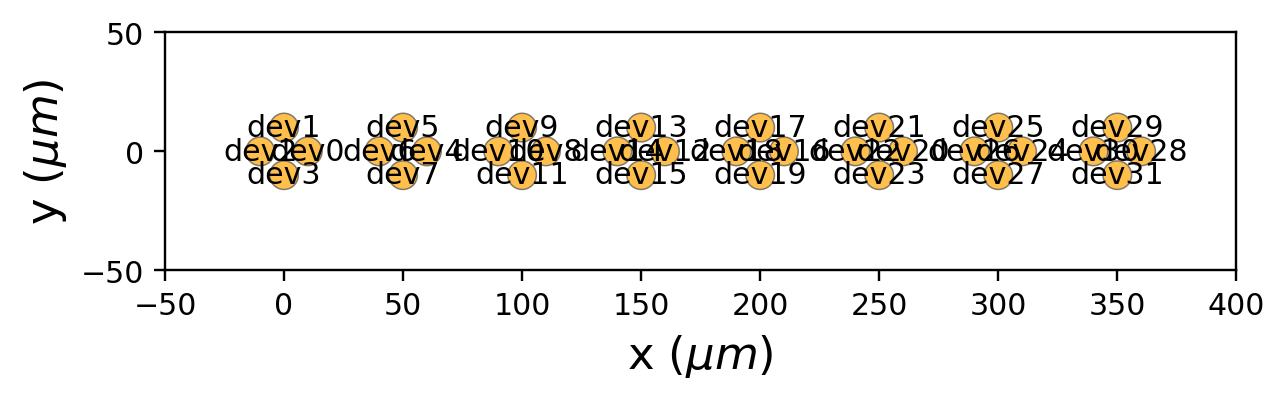

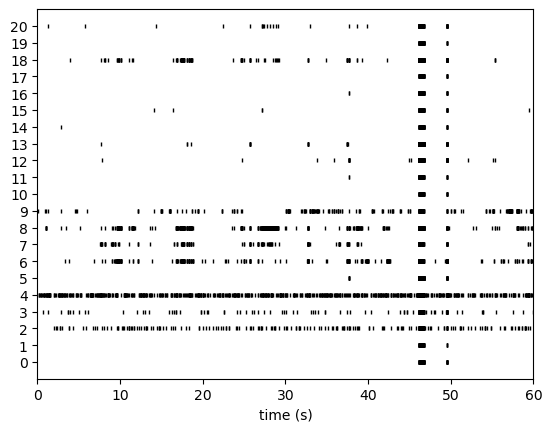

In [18]:
#plot rasters
%matplotlib inline
w_rs = si.plot_rasters(sorted_recording, time_range=(0,60), backend="matplotlib")


In [19]:
#create and save sorting analyzer object
save_path = "C:\\Users\\ryanz\\Documents\\NAc Analysis\\waveforms"
sorting_analyzer = si.create_sorting_analyzer(sorted_recording, 
                                              recording_sub, 
                                              folder=save_path + "\\test_waveforms",
                                              format="binary_folder",
                                              sparse=False, 
                                              overwrite=True)


In [20]:
#load sorting analyzer object
sorting_analyzer = si.load_sorting_analyzer(folder=save_path + "\\test_waveforms")


In [21]:
sorting_analyzer.compute(["random_spikes", "waveforms", 'correlograms', 'spike_amplitudes', 'templates','unit_locations', 'template_similarity'])


compute_waveforms:   0%|          | 0/60 [00:00<?, ?it/s]

Compute : spike_amplitudes:   0%|          | 0/60 [00:00<?, ?it/s]

In [22]:
sorting_analyzer.compute(["noise_levels", "quality_metrics"])

In [23]:
ext = sorting_analyzer.get_extension("waveforms")
ext_data = ext.get_data()


In [24]:
ext_data.shape
#(waveform, per sample, per neuron)

(5318, 90, 21)

In [31]:
ext_data[6][6]

memmap([ -2.5349998,  -2.5349998,  -5.0699997,  -6.24     ,   7.2149997,
         42.51     ,  30.224998 ,   7.2149997,  31.589998 ,  -8.19     ,
        -13.455    , -13.65     ,  -9.36     ,  29.835    ,   0.       ,
         -2.73     ,  -9.945    ,   8.19     ,  29.445    ,   9.165    ,
          9.75     ], dtype=float32)

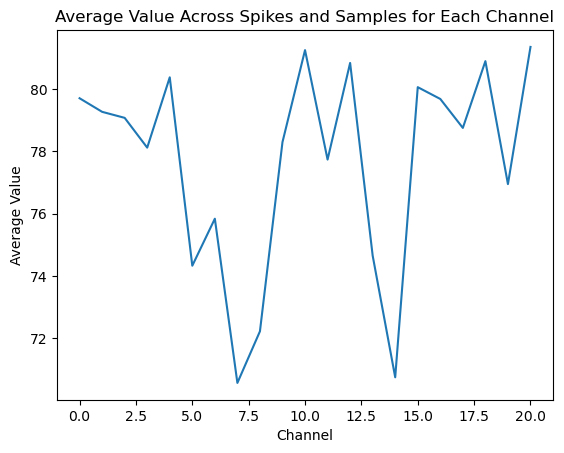

In [35]:
%matplotlib inline
waveforms = np.array(ext_data) 
average_data = np.mean(waveforms, axis=(0, 1))

# Plotting the average for each channel
plt.plot(average_data)
plt.xlabel('Channel')
plt.ylabel('Average Value')
plt.title('Average Value Across Spikes and Samples for Each Channel')
plt.show()



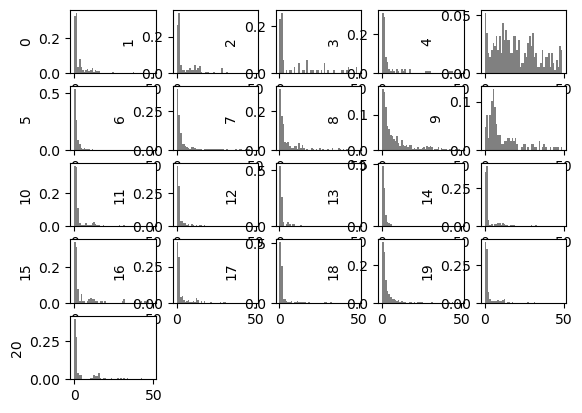

In [27]:
si.plot_isi_distribution(
    sorted_recording,
    window_ms=50
)

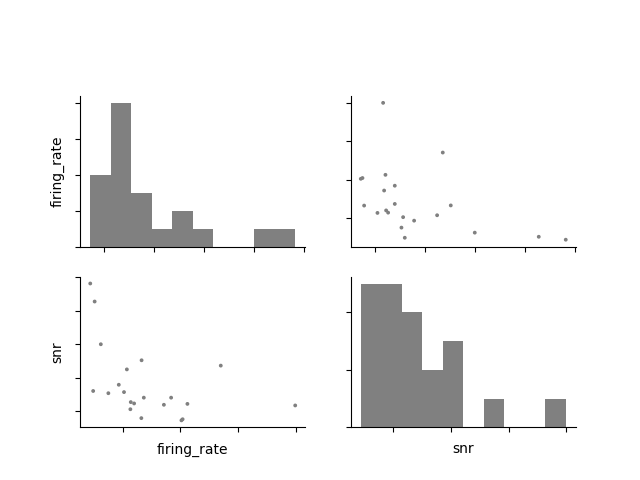

In [28]:
%matplotlib widget
si.plot_quality_metrics(
    sorting_analyzer,
    include_metrics=['firing_rate', 'snr']
)

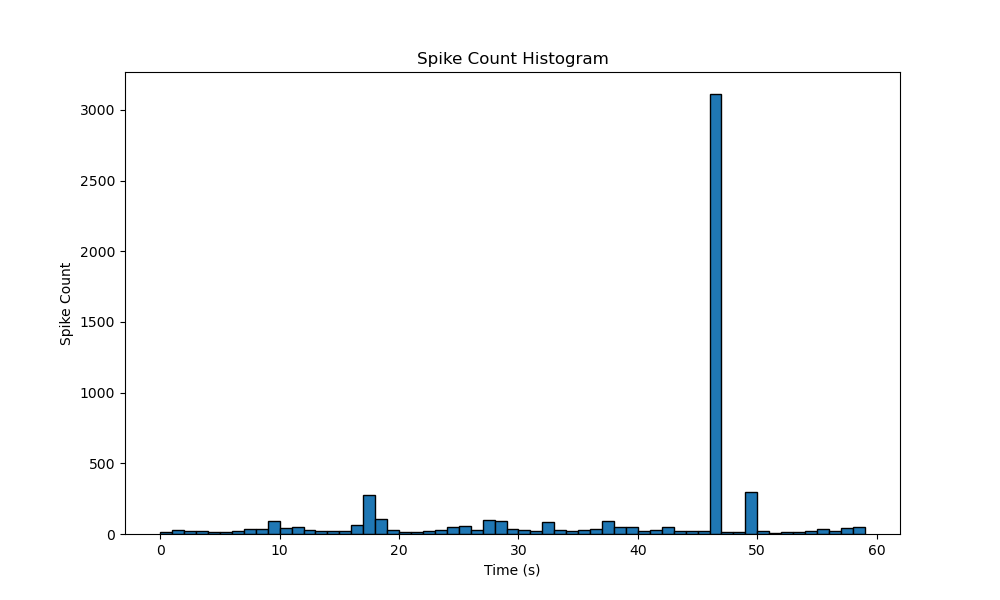

In [29]:
spike_vector = sorted_recording.to_spike_vector()
units = np.unique(spike_vector['unit_index'])

bin_edges = np.arange(0, 60, 1)
spike_counts = np.zeros(len(bin_edges) - 1)

for unit in units:
    spike_times = spike_vector['sample_index'][spike_vector['unit_index'] == unit] / sorted_recording.get_sampling_frequency() 
    spike_counts_per_unit, _ = np.histogram(spike_times, bins=bin_edges)
    spike_counts += spike_counts_per_unit  

plt.figure(figsize=(10, 6))
plt.bar(bin_edges[:-1], spike_counts, width=1, edgecolor='black', align='edge')
plt.xlabel('Time (s)')
plt.ylabel('Spike Count')
plt.title('Spike Count Histogram')
plt.show()
